# Section 1. Getting Started

##1.1 Jupyter notebook set up (same as before)
In a Jupyter notebook, **Cells** are Python code chunks that you can run interactively.


First, make a copy of this notebook to your Google drive:
- Navigate to "**File**" → "**Save a copy in...**"

To run the notebook, there are two options:
1.   connect to a **hosted** runtime, i.e. a remote virtual machine (**recommended**);
2.   connect to your **local** runtime.

You can configure this at the top right corner of this page:

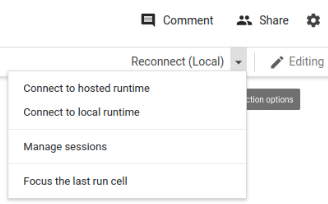






After setting up the runtime, try this one below:

In [ ]:
print('Hello from Praktikum ST.')

Hello from Praktikum ST.


Before starting, let's list the available packages in the environment.

Verify that **`torch`** is there, since we'll need it for training our models.

In [ ]:
!pip list -v

Package                            Version             Location                                Installer
---------------------------------- ------------------- --------------------------------------- ---------
absl-py                            1.4.0               /usr/local/lib/python3.10/dist-packages uv
accelerate                         0.34.2              /usr/local/lib/python3.10/dist-packages uv
aiohappyeyeballs                   2.4.3               /usr/local/lib/python3.10/dist-packages uv
aiohttp                            3.10.10             /usr/local/lib/python3.10/dist-packages uv
aiosignal                          1.3.1               /usr/local/lib/python3.10/dist-packages uv
alabaster                          0.7.16              /usr/local/lib/python3.10/dist-packages uv
albucore                           0.0.19              /usr/local/lib/python3.10/dist-packages uv
albumentations                     1.4.20              /usr/local/lib/python3.10/dist-packages uv
altair

## 1.2 Enabling and testing the GPU

When training your model, having a GPU is convenient, as the training can be well parallelized.

First, let's enable GPUs for this notebook:

- Navigate to "**Edit**" → "**Notebook Settings**"
- Select GPU from the **Hardware Accelerator** drop-down

Next, we'll check if we can connect to the GPU with PyTorch:

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print('Current device:', torch.cuda.get_device_name(device))
else:
    print('Failed to find GPU. Will use CPU.')
    device = 'cpu'

Current device: Tesla T4


Note that, since the task for this lab is more computationally expensive than the previous lab, it will **only feasible to be performed on the cluster**, rather than the free Colab GPU.

In this Colab notebook, we only use a very small subset of the data for demonstration.

## 1.3 What are we doing for this lab?

**Recall tasks' definitions:**

$ English Speech \xrightarrow[]{\text{ASR}} English Text \xrightarrow[]{\text{MT (last lab)}} German Text $

&emsp;&emsp;&emsp;&emsp;|<ins>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;ST&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</ins>|



**This lab:**

We will first walk through an example of training an English speech transcription, i.e., Automatic Speech Recognition (ASR) model.

We will use the [fairseq](https://github.com/facebookresearch/fairseq) toolkit [(Ott et al., 2019)](https://aclanthology.org/N19-4009.pdf).

Afterwards, you will build an ASR model for the source language in the translation direction you have chosen.

## 1.4 Saving local files (only relevant when using Colab)

If you are working with a **hosted** runtime, your local files (including the trained models!) could be **removed** when you disconnect the runtime.

To save these files, you might want to **mount** your Google Drive as local storage (see Section 6.1 for details).

A downside, however, is that the storage is capped by your Google drive **storage limit**.


## 1.5 Installing fairseq

In [ ]:
# Cloing fairseq repo from github
!git clone https://github.com/facebookresearch/fairseq.git

Cloning into 'fairseq'...
remote: Enumerating objects: 35385, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 35385 (delta 10), reused 40 (delta 9), pack-reused 35337 (from 1)
Receiving objects: 100% (35385/35385), 25.47 MiB | 20.27 MiB/s, done.
Resolving deltas: 100% (25538/25538), done.


After cloning the repo, we will install fairseq as a library:

In [ ]:
%cd fairseq
!pip install pip==24.0
!pip install --editable ./

/content/fairseq
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Obtaining file:///content/fairseq
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 8.8 MB/s eta 0:00:00
  Building editable for fairseq (pyproject.toml) ... done
  Created wheel for 

Add fairseq to Python path:

In [ ]:
!echo $PYTHONPATH

import os

os.environ['PYTHONPATH'] += ":/content/fairseq/"

!echo $PYTHONPATH

/env/python
/env/python:/content/fairseq/


Other installation for data preprocessing:

In [ ]:
!pip install sentencepiece

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Section 2. Data Preparation


Before training we first preprocess the data.

Let's fetch some sample data.

We will use the clean-100 hour data of [Librispeech](https://www.openslr.org/12), containing audiobooks (English speech) and their transcription (English text).

Downloading could take about 5 minutes.

In [ ]:
from examples.speech_to_text.data_utils import (
    create_zip,
    extract_fbank_features,
    gen_config_yaml,
    gen_vocab,
    get_zip_manifest,
    save_df_to_tsv,
)

from torchaudio.datasets import LIBRISPEECH
from pathlib import Path
from tqdm import tqdm
from torch.utils.data import Subset
import numpy as np

# Define folder path to store the data
out_root = Path("/content/fairseq/examples/speech_to_text/data")
# Create folder if not yet exist
out_root.mkdir(exist_ok=True)

# We will use the clean part of Librispeech for demonstration
# Download the data
print("Fetching training data...")
train_data = LIBRISPEECH(out_root.as_posix(), url="train-clean-100", download=True)
print("Fetching dev data...")
dev_data = LIBRISPEECH(out_root.as_posix(), url="dev-clean", download=True)
print("Fetching test data...")
test_data = LIBRISPEECH(out_root.as_posix(), url="test-clean", download=True)

# Take a subset of the data (first 100 samples for each split) for demonstration
train_data = Subset(dataset=train_data, indices=np.arange(0,100))
dev_data = Subset(dataset=dev_data, indices=np.arange(0,100))
test_data = Subset(dataset=test_data, indices=np.arange(0,100))

/content/fairseq/fairseq/tasks/multires_hubert_pretraining.py:154: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  dictionaries = [ (Dictionary.load(f"{label_dir}/dict.{label}.txt") if label is not "" else None ) for label in self.cfg.labels]


Fetching training data...


100%|██████████| 5.95G/5.95G [04:34<00:00, 23.2MB/s]


Fetching dev data...


100%|██████████| 322M/322M [00:15<00:00, 21.5MB/s]


Fetching test data...


100%|██████████| 331M/331M [00:16<00:00, 20.6MB/s]


Sneak peak at the data:

In [ ]:
from IPython.display import Audio

spk_id = '103'
chapter_no = '1240'
utt_no = '0000'

text_path = out_root / 'LibriSpeech' / 'train-clean-100' / spk_id / chapter_no / f"{spk_id}-{chapter_no}.trans.txt"
with open(text_path) as f:
    first_line_0000 = f.readline()
print(first_line_0000)

audio_path = out_root / 'LibriSpeech' / 'train-clean-100' / spk_id / chapter_no / f"{spk_id}-{chapter_no}-{utt_no}.flac"
Audio(audio_path)



103-1240-0000 CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED MISSUS RACHEL LYNDE LIVED JUST WHERE THE AVONLEA MAIN ROAD DIPPED DOWN INTO A LITTLE HOLLOW FRINGED WITH ALDERS AND LADIES EARDROPS AND TRAVERSED BY A BROOK



❓Do you see anything missing in the text transcription? How would it affect our end goal of performing Speech Translation?

For audio data, we will extract their log [mel filter bank](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) features. We will use the `extract_fbank_features` function provided by fairseq, which uses [kaldi](https://github.com/pykaldi/pykaldi) or [torchaudio](https://github.com/pytorch/audio) underneath to extract the features.

In [ ]:
# Define file path to store the features
feature_root = out_root / "fbank80"
feature_root.mkdir(exist_ok=True)

# Extract features of all audios in all data splits
for dataset in [train_data, dev_data, test_data]:
    print(f"Extracting log mel filter bank features of audio")
    for wav, sample_rate, _, spk_id, chapter_no, utt_no in tqdm(dataset):
        sample_id = f"{spk_id}-{chapter_no}-{utt_no}"
        extract_fbank_features(
                wav, sample_rate, feature_root / f"{sample_id}.npy"
        )


# Pack audio features into ZIP
zip_path = out_root / "fbank80.zip"
print("ZIPing features...")
create_zip(feature_root, zip_path)


Extracting log mel filter bank features of audio


100%|██████████| 100/100 [00:05<00:00, 19.43it/s]


Extracting log mel filter bank features of audio


100%|██████████| 100/100 [00:01<00:00, 61.76it/s]


Extracting log mel filter bank features of audio


100%|██████████| 100/100 [00:01<00:00, 50.41it/s]


ZIPing features...


100%|██████████| 300/300 [00:00<00:00, 463.69it/s]


Let's take a closer look of the extracted features of the audio we've seen above:

Feature vector shape: (1407, 80)


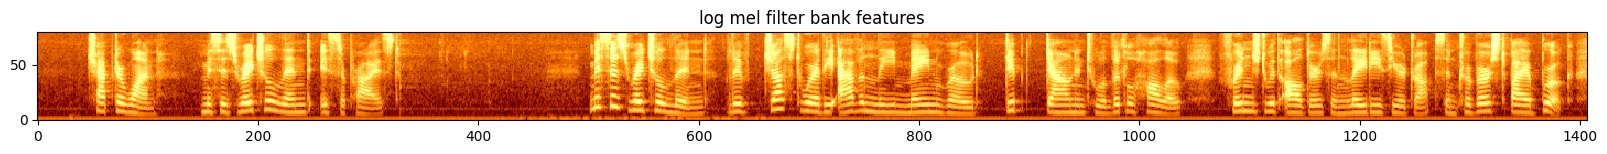

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

spk_id = '103'
chapter_no = '1240'
utt_no = '0'
sample_id = f"{spk_id}-{chapter_no}-{utt_no}"
feat = np.load(feature_root / f"{sample_id}.npy")
print(f'Feature vector shape: {feat.shape}')

# Plot the extracted feature
fig, ax = plt.subplots(figsize=(20, 4))
cax = ax.imshow(np.transpose(feat), interpolation='nearest', cmap=cm.afmhot, origin='lower')
ax.set_title('log mel filter bank features')

plt.show()


❓Can you explain the shape you see?

❓Can you record your own voice, extract the features and plot it in the same manner?

Generating TSV manifest files, containing samples' metadata

In [ ]:
import pandas as pd

MANIFEST_COLUMNS = ["id", "audio", "n_frames", "tgt_text", "speaker"]

print("Fetching audio manifest...")
audio_paths, audio_lengths = get_zip_manifest(zip_path)

for dataset, split_name in zip([train_data, dev_data, test_data],
                               ["train-clean-100", "dev-clean", "test-clean",]):
  print(f"Fetching manifest from {split_name}...")
  manifest = {c: [] for c in MANIFEST_COLUMNS}
  for _, _, utt, spk_id, chapter_no, utt_no in tqdm(dataset):
      sample_id = f"{spk_id}-{chapter_no}-{utt_no}"
      manifest["id"].append(sample_id)
      manifest["audio"].append(audio_paths[sample_id])
      manifest["n_frames"].append(audio_lengths[sample_id])
      manifest["tgt_text"].append(utt.lower())
      manifest["speaker"].append(spk_id)
  save_df_to_tsv(
      pd.DataFrame.from_dict(manifest), out_root / f"{split_name}.tsv"
  )

Fetching audio manifest...


100%|██████████| 300/300 [00:00<00:00, 1839.31it/s]


Fetching manifest from train-clean-100...


100%|██████████| 100/100 [00:00<00:00, 107.71it/s]


Fetching manifest from dev-clean...


100%|██████████| 100/100 [00:00<00:00, 374.05it/s]


Fetching manifest from test-clean...


100%|██████████| 100/100 [00:00<00:00, 303.91it/s]


For text data, we use the [sentencepiece](https://github.com/google/sentencepiece) package to train a subwords segmentation model and generate the subword vocabulary (same as before).

In [ ]:
# Collect train text to generate sentencepiece model and vocabulary later on
train_text = pd.read_csv(out_root / "train-clean-100.tsv", sep='\t')["tgt_text"].tolist()

In [ ]:
with open(out_root / 'train_text.txt', 'w') as f:
  for t in train_text:
      f.write(t + "\n")


In [ ]:
# Train sentencepiece model and generate subword vocabulary

# The vocab size depends on your dataset size . Since we are using a very small
# subset of the data for demonstration, we set a small vocab size of 900
VOCAB_SIZE = 900
gen_vocab(
    Path(out_root / 'train_text.txt'),
    out_root / f"spm_unigram{VOCAB_SIZE}",
    model_type='unigram',
    vocab_size=VOCAB_SIZE,
)


Generate config YAML file to be used for the training script:

In [ ]:
gen_config_yaml(
    out_root,
    spm_filename=f"spm_unigram{VOCAB_SIZE}.model"
)

# Section 3. Training

After data preparation, it's time do train a model!

We will train a [Speech-to-Text Transformer](https://arxiv.org/abs/2010.05171) model of "base" configuration.

Feel free to check the [documentation](https://fairseq.readthedocs.io/en/latest/command_line_tools.html) of fairseq commands.

❓Why do we need a much larger `max-tokens` than when training a Machine Translation model?

❓Can you again tell from the training log: the number of encoder layers, the number of decoder layers, embedding size, number of trainable parameters...?

❓What are the difference comparing to the Machine Translation model that we have seen in the previous lab? Can you tell why?

In [ ]:
!CUDA_VISIBLE_DEVICES=0 fairseq-train "/content/fairseq/examples/speech_to_text/data" --save-dir "/content/fairseq/examples/speech_to_text/models" \
  --train-subset train-clean-100 --valid-subset dev-clean \
  --num-workers 4 --max-tokens 40000 --max-update 300000 \
  --task speech_to_text --criterion label_smoothed_cross_entropy --label-smoothing 0.1 --report-accuracy \
  --arch s2t_transformer_s --share-decoder-input-output-embed \
  --optimizer adam --lr 2e-3 --lr-scheduler inverse_sqrt --warmup-updates 10000 \
  --clip-norm 10.0 --seed 1 --update-freq 8

2024-11-05 09:35:37.835515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 09:35:37.862521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 09:35:37.872988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 09:35:39.351011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-05 09:35:41 | INFO | numexpr.utils | NumExpr defaulting to 2 threads.
2024-11-05 09:35:43 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2024-11-05 09:35:45 | INFO | fairseq_cli.train | 

# Section 4. Inference & Evaluation

Now we can generate transcription with the trained model. Notice that we set the `scoring` parameter to be `wer`. WER, i.e., **Word Error Rate**, is the metrics that we use to evaluate our English ASR model. WER is defined as the number of errornously transcribed words divided by the total number of words in the reference sentence.

❓ Is WER suitable for languages such as Chinese or Janpanese?

In [ ]:
PRED_OUTPUT_DIR="/content/fairseq/examples/speech_to_text/pred_eval"
PRED_LOG=f"{PRED_OUTPUT_DIR}/en_s2t.pred.log"
!mkdir $PRED_OUTPUT_DIR
!fairseq-generate "/content/fairseq/examples/speech_to_text/data" \
    --config-yaml config.yaml --gen-subset test-clean \
    --task speech_to_text \
    --path "/content/fairseq/examples/speech_to_text/models/checkpoint_best.pt" \
    --max-tokens 50000 --beam 5 --scoring wer > $PRED_LOG

2024-11-05 09:41:09.436879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 09:41:09.464200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 09:41:09.472735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 09:41:11.189463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:hydra.core.utils:Setting JobRuntime:name=UNKNOWN_NAME
DEBUG:hydra.core.utils:Setting JobRuntime:name=utils
INFO:fairseq_cli.generate:{'_name': None

We extract the hypotheses and references from the decoding log file.

In [ ]:
!grep ^H $PRED_LOG | sed 's/^H-//g' | cut -f 3 | sed 's/ ##//g' > $PRED_OUTPUT_DIR/hyp.txt
!grep ^T $PRED_LOG | sed 's/^T-//g' | cut -f 2 | sed 's/ ##//g' > $PRED_OUTPUT_DIR/ref.txt

Sneak peak at the hypotheses and references:

In [ ]:
!head $PRED_OUTPUT_DIR/hyp.txt
!head $PRED_OUTPUT_DIR/ref.txt

▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house ▁house
d d d d d d d d d d d d d d d d d d d d d d ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁hav ▁ha

The WER score is reported at the end of the log file:

In [ ]:
!tail -n 1 $PRED_LOG

Generate test-clean with beam=5: WER: 382.00


# Section 6. Next Steps

## 6.1 Saving Local Files
To save files in from the hosted runtime to your local storage, you can use the following code to mount your Google Drive:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
# Go to your drive
%cd /content/drive/MyDrive
# Make directory named ST2
!mkdir -p ST2
# Go to the newly created directory
%cd ST2

KeyboardInterrupt: 

After that, you can use `cp` to copy files from the hosted runtime to your local storage.

## 6.2 Action Items
* Train an ASR model for the SRC language(s) of your chosen translation direction(s).
* Optional: See whether you can make use of wav2vec 2.0 for training your ASR (wav2vec 2.0 resources provided in the slides.)
* Once you have your ASR and MT models ready, set up your first ST system (cascaded), and evaluate it on a ST test set.
* Send us your lab report 2 days before the next session. When compiling the report, consider including the following information:
    * **dataset** information (which corpus; size of train / dev / test sets)
    * model **architecture**
    * **performance** on dev and test sets
    * **One page** should be enough to cover the important information
    * mail to Tu Anh Dinh tu.dinh@kit.edu
    


## 6.3 ❓ Food for Thought

* Is there any drawbacks with the cascaded approach for ST?